# KIA 10 Y
- period
    - 2009-03-23 ~ 2018-05-30
- features
    - ['a0', 'a1', 'b0', 'tau']\('k', 'fitN'\)
    - 40 features to represent oneday dynamics
> - $a_0 (k)$ : a0k01 ~ a0k10
> - $a_1 (k)$ : a1k01 ~ a1k10
> - $b_0 (k)$ : b0k01 ~ b0k10
> - $\tau(k)$ : tau01 ~ tau10

- targets
    - 5 targets to show the change in prices
> - 'C1O1',	'C2O1',	'O2C1',	'C2C1',	'C2O2'

## Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
# Load ddata with features (40) and targets (5)

filename = 'kia_features_targets.csv'
df = pd.read_csv(filename)  

In [43]:
df.shape # 2276 market-open days for 10 years; prices, features, targets

(2276, 52)

In [44]:
df.head()

,Date,Open,High,Low,Close,Volume,Change,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,C1O1,C2O1,O2C1,C2C1,C2O2
0,2009-03-23,7850,8120,7800,8080,8344058,0.049351,-2.727038,-3.703672,-3.933671,-4.360880,-3.669309,-3.317302,-3.789300,-2.920232,-2.455292,-2.013126,0.001550,0.001828,0.002574,0.002469,0.001936,0.001605,0.001868,0.001748,0.001631,0.001319,2.984912,3.313493,4.407811,4.251816,3.896841,3.441775,3.772554,3.582601,3.674260,3.246674,1461.122,1499.507,1292.837,1329.968,1547.975,1681.609,1597.517,1526.722,1628.337,1772.121,1,1,1,1,0
1,2009-03-24,8240,8260,8010,8180,6652120,0.012376,-3.122411,-3.348649,-2.933583,-2.821247,-3.108235,-2.540054,-2.970022,-2.841218,-2.774238,-3.082254,0.001416,0.001648,0.001455,0.001291,0.001519,0.001233,0.001463,0.001439,0.001329,0.001453,3.726610,3.733350,3.459047,3.197817,3.748140,3.000958,3.505756,3.389110,3.433971,3.807786,2029.949,1743.483,1813.185,1923.603,1887.045,1857.774,1832.649,1788.894,1965.954,2001.118,0,0,0,0,0
2,2009-03-25,8120,8180,7970,8100,5107740,-0.009780,-3.880331,-4.056443,-3.193778,-3.189689,-2.891290,-2.845863,-3.229054,-2.707997,-2.366482,-2.419309,0.001894,0.002004,0.001549,0.001557,0.001381,0.001586,0.001585,0.001478,0.001334,0.001385,4.632692,4.571159,3.624464,3.840120,3.534951,3.847850,3.906032,3.480426,3.133456,3.330892,1886.318,1752.629,1803.177,1882.571,1949.354,1796.506,1879.283,1756.918,1745.643,1774.590,0,1,1,1,1
3,2009-03-26,8170,8480,8110,8420,13682048,0.039506,-1.300494,-1.856442,-3.267227,-2.730512,-2.687609,-3.435165,-3.552223,-3.506665,-2.362029,-2.341256,0.000936,0.001350,0.001954,0.001735,0.001793,0.002152,0.002307,0.002367,0.001762,0.001711,2.184273,2.576021,3.417829,3.402454,3.396926,3.455015,3.743746,3.993577,3.052707,3.019495,1727.351,1429.803,1353.847,1441.596,1385.083,1231.359,1213.075,1248.435,1258.803,1283.662,1,1,1,1,0
4,2009-03-27,8570,9070,8470,8490,16489312,0.008314,-2.174669,-1.067556,-1.521173,-1.520366,-2.777781,-1.884196,0.008117,-1.528813,-1.225869,-1.279469,0.001369,0.000632,0.000701,0.000760,0.001281,0.001095,0.000298,0.000988,0.000767,0.000762,2.176573,2.159975,2.257061,2.608248,4.072698,2.605460,1.016953,2.209636,2.228379,2.235360,1671.920,2664.374,2552.312,2545.264,2374.108,1899.040,3208.407,1663.462,2103.401,2129.005,0,0,1,0,0


In [45]:
df.tail()

,Date,Open,High,Low,Close,Volume,Change,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,C1O1,C2O1,O2C1,C2C1,C2O2
2271,2018-05-24,33450,33450,32100,32700,1750711,-0.028232,-0.585490,-0.625853,-0.543544,-0.584065,-0.422708,-0.465191,-0.388827,-0.347194,-0.433477,-0.465209,0.000030,0.000048,0.000027,0.000029,0.000022,0.000024,0.000020,0.000018,0.000022,0.000027,1.089124,1.189908,0.995531,1.051124,0.773495,0.826473,0.735872,0.671599,0.782948,0.881172,27592.76,23938.41,28550.39,27705.77,27346.57,26530.38,28559.45,30225.58,26938.09,25252.68,0,0,0,0,0
2272,2018-05-25,32550,32750,32000,32250,796582,-0.013761,-0.394717,-0.544352,-0.515983,-0.424708,-0.521054,-0.448672,-0.390368,-0.389287,-0.253047,-0.404310,0.000021,0.000030,0.000028,0.000028,0.000053,0.000024,0.000022,0.000021,0.000075,0.000021,0.698212,0.940178,0.946924,0.676377,0.651801,0.795965,0.704167,0.648718,0.577611,0.662864,25118.36,24177.87,25822.77,21860.54,20519.80,25938.52,25275.38,24235.08,11276.32,24566.47,0,0,1,1,0
2273,2018-05-28,32450,32500,31900,32300,721091,0.001550,0.000000,-1.051603,-0.564302,-0.621620,-0.872420,-0.663673,-0.479929,-0.511283,-0.438250,-0.409523,0.000000,0.000187,0.000032,0.000033,0.000045,0.000035,0.000025,0.000025,0.000027,0.000021,0.000000,1.013802,0.973305,1.089854,1.228225,1.079917,0.873741,0.829169,0.776875,0.746302,0.00,23944.48,24380.62,25779.98,22340.07,24330.83,26612.55,26190.91,24455.42,26901.06,0,0,0,0,0
2274,2018-05-29,32250,32400,31600,31650,896720,-0.020124,-0.653615,-0.432038,-0.545447,-0.382949,-0.557077,-0.430326,-0.428662,-0.422854,-0.355154,-0.281713,0.000034,0.000047,0.000034,0.000019,0.000030,0.000023,0.000023,0.000022,0.000018,0.000014,1.352913,0.836114,0.903707,0.623943,0.809665,0.754945,0.772416,0.739222,0.623434,0.510985,29970.86,19545.98,22231.27,25134.90,22010.64,25308.13,26093.22,26054.51,26200.00,26692.99,0,0,0,1,1
2275,2018-05-30,31450,31950,31400,31700,885930,0.001580,-0.909242,-0.717859,-0.663725,-0.557721,-0.586936,-0.619580,-0.557049,-0.595521,-0.570060,-0.619659,0.000047,0.000038,0.000034,0.000030,0.000031,0.000034,0.000030,0.000031,0.000030,0.000033,1.630237,1.179362,1.184611,0.946422,1.003503,1.086507,0.952689,1.025429,0.986699,1.065320,26317.73,24196.48,27001.12,24538.75,25239.68,24645.88,24562.41,24977.92,25263.94,24705.70,1,0,1,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2276 non-null   object 
 1   Open    2276 non-null   int64  
 2   High    2276 non-null   int64  
 3   Low     2276 non-null   int64  
 4   Close   2276 non-null   int64  
 5   Volume  2276 non-null   int64  
 6   Change  2276 non-null   float64
 7   a0k01   2276 non-null   float64
 8   a0k02   2276 non-null   float64
 9   a0k03   2276 non-null   float64
 10  a0k04   2276 non-null   float64
 11  a0k05   2276 non-null   float64
 12  a0k06   2276 non-null   float64
 13  a0k07   2276 non-null   float64
 14  a0k08   2276 non-null   float64
 15  a0k09   2276 non-null   float64
 16  a0k10   2276 non-null   float64
 17  a1k01   2276 non-null   float64
 18  a1k02   2276 non-null   float64
 19  a1k03   2276 non-null   float64
 20  a1k04   2276 non-null   float64
 21  a1k05   2276 non-null   float64
 22  

## Graph of tau and KIACar
- Compare tau and KIA(close)
- Any relationship?

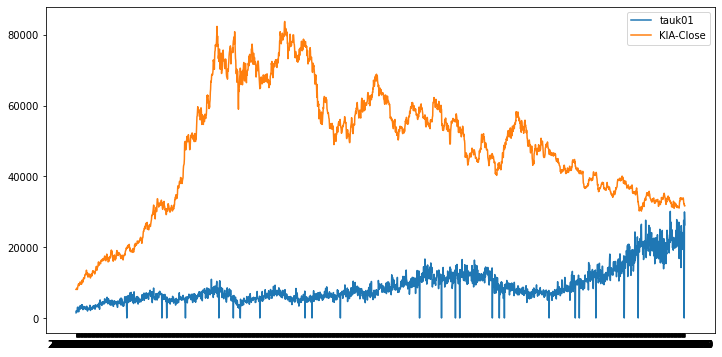

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['tauk01'])
plt.plot(df['Close'])
plt.legend(['tauk01', 'KIA-Close'])
plt.show()

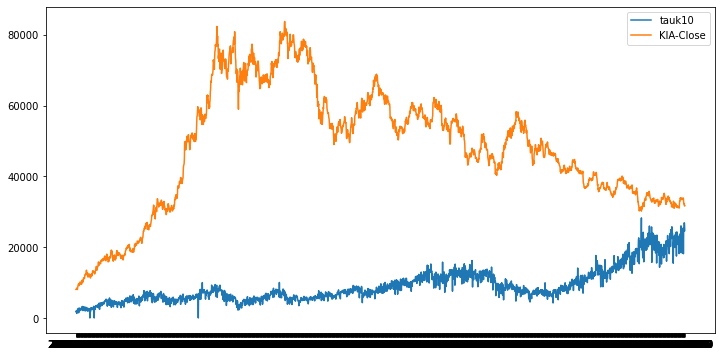

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['tauk10'])
plt.plot(df['Close'])
plt.legend(['tauk10', 'KIA-Close'])
plt.show()

# features of one day : 10x4 = 40

- $a_0 (k)$ : a0k01 ~ a0k10
- $a_1 (k)$ : a1k01 ~ a1k10
- $b_0 (k)$ : b0k01 ~ b0k10
- $\tau(k)$ : tau01 ~ tau10
- $fn(k)$ : fn01 ~ fn10
- $ 1 \le k \le 10 $

# 40 featues show complex dynamics in a day (today) => predict what?
- C1 >< O1 (Close >< Open in today)
- C2 >< O1 (Close in the next day >< Open in today)
- O2 >< C1 (Open in the next day >< Close in today)
- C2 >< C1 (Close in the next day >< Close in today)
- C2 >< O2 (Close >< Open in the next day)
    - O2 >< O1 (Open in the next day >< Open in today)  (deleted)

## Graph of a0,a1,b0,tau along k, $ 1 \le k \le 10 $

### a0(k=1),a1(k=1),b0(k=1),tau(k=1)

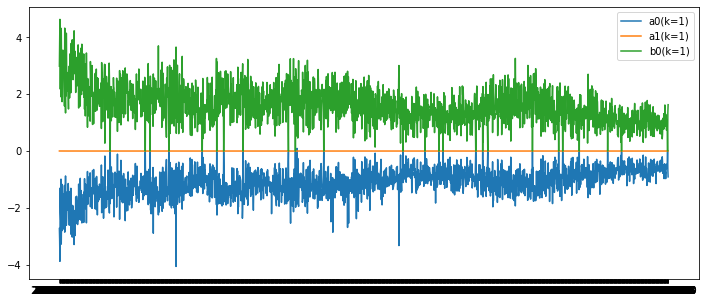

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'],df['a0k01'])
plt.plot(df['Date'],df['a1k01'])
plt.plot(df['Date'],df['b0k01'])
# plt.plot(df['Date'],df['tauk01'])
plt.legend(['a0(k=1)','a1(k=1)','b0(k=1)','tau(k=1)'])
plt.show()

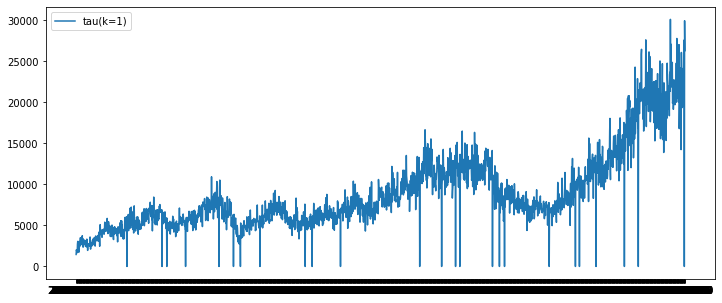

In [ ]:
plt.figure(figsize=(12,5))
# plt.plot(df['Date'],df['a0k01'])
# plt.plot(df['Date'],df['a1k01'])
# plt.plot(df['Date'],df['b0k01'])
plt.plot(df['Date'],df['tauk01'])
plt.legend(['tau(k=1)'])
plt.show()

##targets
- 'C1O1',	'C2O1',	'O2C1',	'C2C1',	'C2O2'

In [47]:
target_columns = ['C1O1','C2O1','O2C1','C2C1','C2O2']

In [48]:
targets_count = []
for target in target_columns:
    cnt = list(df[target].value_counts())
    targets_count.append(cnt)

targets_count

[[1243, 1033], [1181, 1095], [1140, 1136], [1182, 1094], [1244, 1032]]

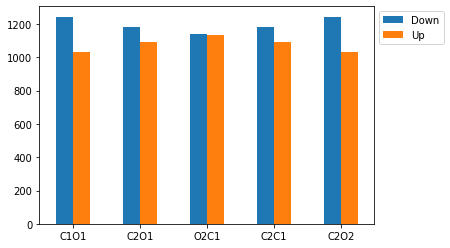

In [49]:
index = np.arange(len(target_columns))
df_target = pd.DataFrame(np.array(targets_count))
df_target.plot.bar()
plt.xticks(index,target_columns, rotation=0)
plt.legend(['Down','Up'], bbox_to_anchor=(1., 1))
plt.show()

### 머신러닝 목표
- 하루의 동역학(40개의 특성)이 무엇을 예측할 수 있는가?
    - 'C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2'

- 문제점
    - 40개의 특성 중 248 개가 0
    - 0 -> 결정안된 동역학
    - 0을 어떻게 처리해서 모델을 만들어야하는 지?


In [74]:
# make feature(40) + target('C2C1')
df_dataset01_arr = df.iloc[:,7:47].values
df_dataset01_arr.shape

(2276, 40)

In [75]:
df_target01_arr = df.iloc[:,50].values   # 'C2C1'
df_target01_arr.shape

(2276,)

In [76]:
df_target01_arr = df_target01_arr[:,np.newaxis]
df_target01_arr.shape

(2276, 1)

In [77]:
type(df_dataset01_arr),type(df_target01_arr)

(numpy.ndarray, numpy.ndarray)

In [78]:
# np.concatenate((first, second), axis=1)
# df_target01_arr = df_target01_arr[:,np.newaxis]
df_dataset = np.concatenate((df_dataset01_arr, df_target01_arr), axis=1)
df_dataset.shape

(2276, 41)

In [79]:
type(df_dataset)

numpy.ndarray

In [80]:
list(df.columns[7:47])+list(['C2C1'])

['a0k01',
 'a0k02',
 'a0k03',
 'a0k04',
 'a0k05',
 'a0k06',
 'a0k07',
 'a0k08',
 'a0k09',
 'a0k10',
 'a1k01',
 'a1k02',
 'a1k03',
 'a1k04',
 'a1k05',
 'a1k06',
 'a1k07',
 'a1k08',
 'a1k09',
 'a1k10',
 'b0k01',
 'b0k02',
 'b0k03',
 'b0k04',
 'b0k05',
 'b0k06',
 'b0k07',
 'b0k08',
 'b0k09',
 'b0k10',
 'tauk01',
 'tauk02',
 'tauk03',
 'tauk04',
 'tauk05',
 'tauk06',
 'tauk07',
 'tauk08',
 'tauk09',
 'tauk10',
 'C2C1']

In [81]:
df_dataset = pd.DataFrame(df_dataset, columns=list(df.columns[7:47])+list(['C2C1'])) #, inplace=True)
df_dataset.shape,df_dataset.head()

((2276, 41),
       a0k01     a0k02     a0k03     a0k04  ...    tauk08    tauk09    tauk10  C2C1
 0 -2.727038 -3.703672 -3.933671 -4.360880  ...  1526.722  1628.337  1772.121   1.0
 1 -3.122411 -3.348649 -2.933583 -2.821247  ...  1788.894  1965.954  2001.118   0.0
 2 -3.880331 -4.056443 -3.193778 -3.189689  ...  1756.918  1745.643  1774.590   1.0
 3 -1.300494 -1.856442 -3.267227 -2.730512  ...  1248.435  1258.803  1283.662   1.0
 4 -2.174669 -1.067556 -1.521173 -1.520366  ...  1663.462  2103.401  2129.005   0.0
 
 [5 rows x 41 columns])

In [82]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k01   2276 non-null   float64
 1   a0k02   2276 non-null   float64
 2   a0k03   2276 non-null   float64
 3   a0k04   2276 non-null   float64
 4   a0k05   2276 non-null   float64
 5   a0k06   2276 non-null   float64
 6   a0k07   2276 non-null   float64
 7   a0k08   2276 non-null   float64
 8   a0k09   2276 non-null   float64
 9   a0k10   2276 non-null   float64
 10  a1k01   2276 non-null   float64
 11  a1k02   2276 non-null   float64
 12  a1k03   2276 non-null   float64
 13  a1k04   2276 non-null   float64
 14  a1k05   2276 non-null   float64
 15  a1k06   2276 non-null   float64
 16  a1k07   2276 non-null   float64
 17  a1k08   2276 non-null   float64
 18  a1k09   2276 non-null   float64
 19  a1k10   2276 non-null   float64
 20  b0k01   2276 non-null   float64
 21  b0k02   2276 non-null   float64
 22  

In [84]:
# df = df.astype({"a": int, "b": complex})
df_dataset = df_dataset.astype({'C2C1': int})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k01   2276 non-null   float64
 1   a0k02   2276 non-null   float64
 2   a0k03   2276 non-null   float64
 3   a0k04   2276 non-null   float64
 4   a0k05   2276 non-null   float64
 5   a0k06   2276 non-null   float64
 6   a0k07   2276 non-null   float64
 7   a0k08   2276 non-null   float64
 8   a0k09   2276 non-null   float64
 9   a0k10   2276 non-null   float64
 10  a1k01   2276 non-null   float64
 11  a1k02   2276 non-null   float64
 12  a1k03   2276 non-null   float64
 13  a1k04   2276 non-null   float64
 14  a1k05   2276 non-null   float64
 15  a1k06   2276 non-null   float64
 16  a1k07   2276 non-null   float64
 17  a1k08   2276 non-null   float64
 18  a1k09   2276 non-null   float64
 19  a1k10   2276 non-null   float64
 20  b0k01   2276 non-null   float64
 21  b0k02   2276 non-null   float64
 22  

In [85]:
df_dataset.head()

,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,C2C1
0,-2.727038,-3.703672,-3.933671,-4.360880,-3.669309,-3.317302,-3.789300,-2.920232,-2.455292,-2.013126,0.001550,0.001828,0.002574,0.002469,0.001936,0.001605,0.001868,0.001748,0.001631,0.001319,2.984912,3.313493,4.407811,4.251816,3.896841,3.441775,3.772554,3.582601,3.674260,3.246674,1461.122,1499.507,1292.837,1329.968,1547.975,1681.609,1597.517,1526.722,1628.337,1772.121,1
1,-3.122411,-3.348649,-2.933583,-2.821247,-3.108235,-2.540054,-2.970022,-2.841218,-2.774238,-3.082254,0.001416,0.001648,0.001455,0.001291,0.001519,0.001233,0.001463,0.001439,0.001329,0.001453,3.726610,3.733350,3.459047,3.197817,3.748140,3.000958,3.505756,3.389110,3.433971,3.807786,2029.949,1743.483,1813.185,1923.603,1887.045,1857.774,1832.649,1788.894,1965.954,2001.118,0
2,-3.880331,-4.056443,-3.193778,-3.189689,-2.891290,-2.845863,-3.229054,-2.707997,-2.366482,-2.419309,0.001894,0.002004,0.001549,0.001557,0.001381,0.001586,0.001585,0.001478,0.001334,0.001385,4.632692,4.571159,3.624464,3.840120,3.534951,3.847850,3.906032,3.480426,3.133456,3.330892,1886.318,1752.629,1803.177,1882.571,1949.354,1796.506,1879.283,1756.918,1745.643,1774.590,1
3,-1.300494,-1.856442,-3.267227,-2.730512,-2.687609,-3.435165,-3.552223,-3.506665,-2.362029,-2.341256,0.000936,0.001350,0.001954,0.001735,0.001793,0.002152,0.002307,0.002367,0.001762,0.001711,2.184273,2.576021,3.417829,3.402454,3.396926,3.455015,3.743746,3.993577,3.052707,3.019495,1727.351,1429.803,1353.847,1441.596,1385.083,1231.359,1213.075,1248.435,1258.803,1283.662,1
4,-2.174669,-1.067556,-1.521173,-1.520366,-2.777781,-1.884196,0.008117,-1.528813,-1.225869,-1.279469,0.001369,0.000632,0.000701,0.000760,0.001281,0.001095,0.000298,0.000988,0.000767,0.000762,2.176573,2.159975,2.257061,2.608248,4.072698,2.605460,1.016953,2.209636,2.228379,2.235360,1671.920,2664.374,2552.312,2545.264,2374.108,1899.040,3208.407,1663.462,2103.401,2129.005,0


# pycaret

In [86]:
!pip install pycaret

     |████████████████████████████████| 266kB 4.9MB/s 
     |████████████████████████████████| 6.8MB 8.9MB/s 
     |████████████████████████████████| 276kB 43.9MB/s 
     |████████████████████████████████| 112kB 41.0MB/s 
     |████████████████████████████████| 2.0MB 39.3MB/s 
     |████████████████████████████████| 174kB 43.5MB/s 
     |████████████████████████████████| 14.4MB 196kB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 1.7MB 34.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4MB 27.4MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 256kB 43.8MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 1.1MB 29.1MB/s 
     |████████████████████████████████| 645kB 27.6MB/s 

In [87]:
from pycaret.classification import *

In [ ]:
data = df_dataset.sample(frac=0.95, random_state=786)
data_unseen = df_dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

In [ ]:
clf = setup(data = data, target = 'C2C1',session_id=1104,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

In [ ]:
compare_models(sort='AUC')

In [91]:
lda = create_model('lda', fold =10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.5010,0.4384,0.4776,0.4571,-0.0047,-0.0047
1,0.5461,0.5646,0.3973,0.5370,0.4567,0.0816,0.0844
2,0.5000,0.5334,0.3014,0.4681,0.3667,-0.0153,-0.0163
3,0.5298,0.5603,0.4167,0.5085,0.4580,0.0500,0.0508
4,0.5364,0.5095,0.4167,0.5172,0.4615,0.0628,0.0639
5,0.5099,0.5411,0.3472,0.4808,0.4032,0.0055,0.0057
6,0.5099,0.5116,0.4028,0.4833,0.4394,0.0104,0.0106
7,0.4503,0.4717,0.4028,0.4203,0.4113,-0.1037,-0.1038
8,0.5695,0.5608,0.4861,0.5556,0.5185,0.1324,0.1334
9,0.5629,0.6133,0.3973,0.5686,0.4677,0.1163,0.1217


In [92]:
tuned_lda= tune_model(lda,optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4934,0.5023,0.4247,0.4697,0.4460,-0.0184,-0.0185
1,0.5461,0.5642,0.3973,0.5370,0.4567,0.0816,0.0844
2,0.5000,0.5341,0.3014,0.4681,0.3667,-0.0153,-0.0163
3,0.5298,0.5585,0.4167,0.5085,0.4580,0.0500,0.0508
4,0.5364,0.5090,0.4167,0.5172,0.4615,0.0628,0.0639
5,0.5099,0.5411,0.3472,0.4808,0.4032,0.0055,0.0057
6,0.5166,0.5121,0.4167,0.4918,0.4511,0.0244,0.0247
7,0.4636,0.4747,0.4167,0.4348,0.4255,-0.0771,-0.0772
8,0.5695,0.5585,0.4861,0.5556,0.5185,0.1324,0.1334
9,0.5695,0.6140,0.3973,0.5800,0.4715,0.1293,0.1359


In [93]:
lr = create_model('lr', fold =10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4934,0.5018,0.4247,0.4697,0.4460,-0.0184,-0.0185
1,0.5461,0.5637,0.3973,0.5370,0.4567,0.0816,0.0844
2,0.5000,0.5337,0.3151,0.4694,0.3770,-0.0142,-0.0150
3,0.5232,0.5582,0.4028,0.5000,0.4462,0.0360,0.0366
4,0.5232,0.5047,0.3889,0.5000,0.4375,0.0348,0.0356
5,0.5099,0.5378,0.3611,0.4815,0.4127,0.0068,0.0070
6,0.5232,0.5153,0.4167,0.5000,0.4545,0.0372,0.0377
7,0.4768,0.4743,0.4167,0.4478,0.4317,-0.0518,-0.0520
8,0.5629,0.5596,0.4722,0.5484,0.5075,0.1185,0.1196
9,0.5894,0.6147,0.4247,0.6078,0.5000,0.1699,0.1778


In [94]:
tuned_lr= tune_model(lr,optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5592,0.5011,0.6438,0.5341,0.5839,0.1239,0.1263
1,0.5395,0.5656,0.4658,0.5231,0.4928,0.0737,0.0741
2,0.5329,0.5367,0.5068,0.5139,0.5103,0.0638,0.0639
3,0.5563,0.5615,0.5972,0.5309,0.5621,0.1156,0.1164
4,0.5166,0.5055,0.5417,0.4937,0.5166,0.0352,0.0353
5,0.5298,0.5389,0.5000,0.5070,0.5035,0.0570,0.0570
6,0.5166,0.5135,0.5139,0.4933,0.5034,0.0328,0.0328
7,0.4768,0.4740,0.5417,0.4588,0.4968,-0.0403,-0.0409
8,0.5629,0.5633,0.5833,0.5385,0.5600,0.1272,0.1276
9,0.6026,0.6150,0.5890,0.5890,0.5890,0.2044,0.2044


In [95]:
blend_specific_soft = blend_models(estimator_list = [lda,lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4934,0.5018,0.4247,0.4697,0.4460,-0.0184,-0.0185
1,0.5461,0.5644,0.3973,0.5370,0.4567,0.0816,0.0844
2,0.4934,0.5344,0.3014,0.4583,0.3636,-0.0281,-0.0298
3,0.5232,0.5587,0.4028,0.5000,0.4462,0.0360,0.0366
4,0.5298,0.5074,0.4028,0.5088,0.4496,0.0488,0.0498
5,0.5099,0.5408,0.3472,0.4808,0.4032,0.0055,0.0057
6,0.5232,0.5118,0.4167,0.5000,0.4545,0.0372,0.0377
7,0.4636,0.4743,0.4167,0.4348,0.4255,-0.0771,-0.0772
8,0.5695,0.5605,0.4861,0.5556,0.5185,0.1324,0.1334
9,0.5762,0.6142,0.3973,0.5918,0.4754,0.1424,0.1503


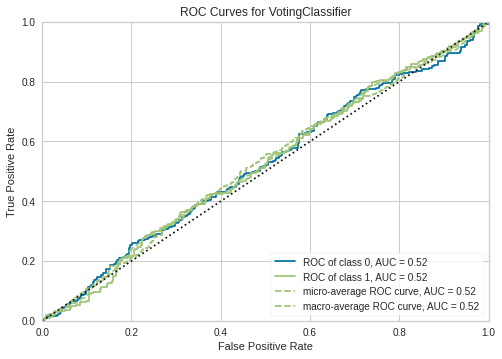

In [96]:
plot_model(blend_specific_soft)

In [97]:
# let's make some predictions 
predict_model(blend_specific_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5254,0.5185,0.3916,0.5021,0.44,0.039,0.0399


,a0k01,a0k06,a1k01,a1k02,a1k03,a1k04,a1k05,a1k09,b0k01,b0k02,b0k03,b0k04,b0k05,b0k07,b0k08,b0k09,b0k10,tauk01,tauk03,C2C1,Label,Score
0,-0.908604,-1.251707,0.950647,1.220133,1.231753,0.960075,1.291579,1.033635,1.275279,1.018723,1.420079,1.111422,1.866050,1.135862,0.777010,0.573314,0.360946,-0.568399,-0.990239,1,0,0.5567
1,0.387882,2.148525,-0.801419,-0.513058,-0.952370,-0.772409,-1.103071,-1.334131,-0.202782,0.243397,-0.299807,-0.380661,-1.600333,-1.530576,-1.485477,-1.416745,-1.320518,0.946505,1.090698,0,1,0.5029
2,0.382445,0.800883,-0.888312,-0.692730,-1.100244,-0.873145,-0.886981,-1.356177,-0.216026,0.325572,-0.649597,-0.284351,-0.073037,-1.044269,-1.180503,-1.512925,-1.695146,1.099356,1.157903,1,0,0.5189
3,1.070797,1.724382,-0.968086,0.005621,-1.729513,-0.961300,-0.649691,-0.991944,-0.682372,-0.224732,-2.586400,-1.355082,-0.941666,-1.593246,-1.136088,-1.254620,-1.896451,0.773375,0.868150,0,0,0.5616
4,0.267650,0.345256,-0.708066,-1.482886,-1.074924,-0.900738,-0.772258,-0.749041,-0.475658,-1.569062,-0.657629,-0.293002,-0.056514,-0.145825,0.127142,-0.100767,-0.080602,0.642546,1.070916,0,1,0.5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.005345,-0.769492,-0.123599,0.262100,0.396246,0.503438,0.391942,0.409044,-0.028790,0.147253,0.406671,0.606967,0.453424,0.030113,0.579390,0.489560,0.461805,0.097353,-0.341300,1,1,0.5310
645,1.648866,-0.134734,-0.902570,-0.230996,-0.823580,0.091942,0.343892,1.173081,-1.719220,-0.657712,-1.823920,-0.667812,-0.425568,-0.455436,0.098108,0.682827,0.607843,-0.648633,-0.405377,0,1,0.5581
646,-1.002172,-0.343120,1.084887,0.867125,0.951480,0.953696,0.798525,0.675277,0.894402,0.966147,0.767440,0.830698,0.825584,0.456377,0.622437,0.669351,0.731570,-0.848110,-0.851395,1,1,0.5724
647,-0.192749,-0.672891,0.721716,0.599683,0.554918,0.715740,0.864240,0.460106,0.254727,0.395881,0.306182,0.572822,0.747644,0.380464,0.719611,0.212053,0.378442,-0.575765,-0.629619,1,0,0.5019


In [98]:
# Finalizing the model
final_model = finalize_model(blend_specific_soft)

In [99]:
# Predict test data
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions

,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,C2C1,Label,Score
0,-2.426072,-1.561580,-2.415754,-1.805048,-2.118285,-2.149641,-2.348657,-2.097220,-2.328626,-2.128146,0.001013,0.000572,0.001049,0.000694,0.000877,0.000940,0.001000,0.000899,0.001150,0.000998,3.684525,1.923219,3.171676,2.335098,2.723221,2.875781,3.131146,2.890877,3.438759,3.014530,2720.491,2631.829,2301.777,2590.281,2384.553,2312.057,2380.509,2435.001,2214.008,2260.609,1,0,0.5712
1,-2.753202,-2.443707,-2.039672,-1.851227,-1.614923,-1.627591,-1.701030,-1.682307,-1.650438,-1.757358,0.001118,0.001047,0.000940,0.000862,0.000761,0.000679,0.000637,0.000750,0.000695,0.000754,3.549847,3.569798,3.273156,3.145170,2.686181,2.513376,2.403771,2.520347,2.305540,2.411702,2434.830,2556.972,2574.614,2683.835,2600.600,2767.551,2884.259,2515.506,2505.724,2429.984,0,1,0.5742
2,-2.059218,-2.025752,-1.906011,-1.948150,-1.708099,-1.986255,-1.872245,-1.864142,-1.624403,-0.880428,0.000811,0.000873,0.000884,0.000862,0.000824,0.000823,0.000858,0.000883,0.000781,0.000527,2.657674,2.484904,2.403000,2.441259,2.370013,2.324456,2.303325,2.348029,2.126285,1.729724,2621.980,2230.535,2082.695,2177.481,2194.109,2219.010,2083.166,2039.902,2082.831,2387.240,0,1,0.5073
3,-2.093905,-2.693523,-1.854322,-1.656105,-1.545321,-1.302817,-1.414856,-1.723714,-2.039891,-1.910111,0.000752,0.000967,0.000763,0.000591,0.000569,0.000460,0.000499,0.000637,0.000762,0.000703,2.722959,3.417043,2.290187,2.210345,2.061256,1.778174,1.978738,2.430236,2.854785,2.658933,2901.806,2772.793,2458.353,2884.753,2815.663,3025.825,3042.630,2914.697,2858.016,2896.783,0,1,0.5503
4,-1.527250,-1.968605,-1.807071,-2.248804,-1.814607,-1.773430,-1.731073,-1.659462,-1.593940,-1.641933,0.000503,0.000623,0.000600,0.000708,0.000580,0.000627,0.000571,0.000518,0.000608,0.000569,1.988747,2.540137,2.540570,2.962218,2.371170,2.290171,2.202138,2.158319,2.176013,2.125084,3077.250,3180.841,3271.376,3248.464,3180.328,2846.414,3007.169,3266.791,2772.993,2904.015,1,1,0.5565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.736016,-0.539781,-0.606936,-0.672227,-0.704337,-0.638220,-0.585926,-0.561229,-0.514938,-0.517851,0.000031,0.000033,0.000035,0.000039,0.000041,0.000037,0.000036,0.000032,0.000030,0.000030,0.856264,0.945042,1.106821,1.194367,1.232318,1.187396,1.083258,1.014485,0.915270,0.920076,23670.280,22949.140,24424.260,23539.210,23254.950,24190.020,22813.650,24110.130,23583.840,23567.210,0,0,0.5258
110,-0.741588,-0.676256,-0.729799,-0.660021,-0.602086,-0.529887,-0.622768,-0.619975,-0.593821,-0.699588,0.000055,0.000044,0.000046,0.000083,0.000037,0.000035,0.000041,0.000046,0.000039,0.000053,1.044127,0.978886,0.958873,0.876386,0.798892,0.780664,0.896747,0.951232,0.866439,1.043107,16847.990,17895.400,17070.900,17277.090,17633.770,17753.580,17333.370,16455.490,17426.220,15523.330,1,1,0.5723
111,-0.798339,-0.491002,-0.567989,-0.329158,-0.325084,-0.439636,-0.566383,-0.484320,-0.432590,-0.432171,0.000052,0.000029,0.000036,0.000020,0.000019,0.000027,0.000034,0.000030,0.000027,0.000032,0.988937,0.987892,0.675228,0.554801,0.565536,0.723992,0.852363,0.788783,0.762758,0.717654,16726.940,25625.110,18521.100,21625.130,22438.540,21147.460,19889.330,20708.450,21759.500,20132.190,1,0,0.5825
112,-0.457945,-0.631614,-0.579607,-0.553344,-0.619934,-0.652017,-0.799311,-0.588441,-0.554906,-0.530555,0.000025,0.000035,0.000033,0.000033,0.000036,0.000037,0.000047,0.000035,0.000033,0.000032,0.818310,0.974574,0.964183,0.976874,1.052527,1.111420,1.398562,0.984891,0.901901,0.866791,25009.650,21978.190,22291.520,22694.150,22610.230,22918.070,23073.150,21964.330,21160.770,21206.530,0,0,0.5993


# target-02
- 'C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2'
    - 'C1O1'


In [100]:
df_target02_arr = df.iloc[:,47].values   # 'C1O1'
df_target02_arr = df_target02_arr[:,np.newaxis]
# df_target01_arr.shape
df_dataset02 = np.concatenate((df_dataset01_arr, df_target02_arr), axis=1)
df_dataset02.shape

(2276, 41)

In [102]:
df_dataset02 = pd.DataFrame(df_dataset02, columns=list(df.columns[7:47])+list(['C1O1'])) 
df_dataset02.shape,df_dataset02.head()

((2276, 41),
       a0k01     a0k02     a0k03     a0k04  ...    tauk08    tauk09    tauk10  C1O1
 0 -2.727038 -3.703672 -3.933671 -4.360880  ...  1526.722  1628.337  1772.121   1.0
 1 -3.122411 -3.348649 -2.933583 -2.821247  ...  1788.894  1965.954  2001.118   0.0
 2 -3.880331 -4.056443 -3.193778 -3.189689  ...  1756.918  1745.643  1774.590   0.0
 3 -1.300494 -1.856442 -3.267227 -2.730512  ...  1248.435  1258.803  1283.662   1.0
 4 -2.174669 -1.067556 -1.521173 -1.520366  ...  1663.462  2103.401  2129.005   0.0
 
 [5 rows x 41 columns])

In [104]:
df_dataset = df_dataset02.astype({'C1O1': int})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k01   2276 non-null   float64
 1   a0k02   2276 non-null   float64
 2   a0k03   2276 non-null   float64
 3   a0k04   2276 non-null   float64
 4   a0k05   2276 non-null   float64
 5   a0k06   2276 non-null   float64
 6   a0k07   2276 non-null   float64
 7   a0k08   2276 non-null   float64
 8   a0k09   2276 non-null   float64
 9   a0k10   2276 non-null   float64
 10  a1k01   2276 non-null   float64
 11  a1k02   2276 non-null   float64
 12  a1k03   2276 non-null   float64
 13  a1k04   2276 non-null   float64
 14  a1k05   2276 non-null   float64
 15  a1k06   2276 non-null   float64
 16  a1k07   2276 non-null   float64
 17  a1k08   2276 non-null   float64
 18  a1k09   2276 non-null   float64
 19  a1k10   2276 non-null   float64
 20  b0k01   2276 non-null   float64
 21  b0k02   2276 non-null   float64
 22  

In [106]:
data = df_dataset.sample(frac=0.95, random_state=786)
data_unseen = df_dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (2162, 41)
Unseen Data For Predictions (114, 41)


In [108]:
clf = setup(data = data, target = 'C1O1',session_id=1104,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1104
1,Target,C1O1
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2162, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [109]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5361,0.5264,0.3810,0.4769,0.4227,0.0435,0.0443,0.019
knn,K Neighbors Classifier,0.5367,0.5209,0.3913,0.4781,0.4299,0.0465,0.0472,0.120
dt,Decision Tree Classifier,0.5142,0.5092,0.4610,0.4578,0.4589,0.0184,0.0184,0.040
lda,Linear Discriminant Analysis,0.5433,0.5057,0.1491,0.4692,0.2259,0.0124,0.0170,0.020
lr,Logistic Regression,0.5439,0.5036,0.1388,0.4695,0.2135,0.0116,0.0165,0.035
et,Extra Trees Classifier,0.5188,0.5019,0.2969,0.4443,0.3553,-0.0047,-0.0047,0.565
ada,Ada Boost Classifier,0.5360,0.4988,0.2660,0.4689,0.3377,0.0218,0.0242,0.219
qda,Quadratic Discriminant Analysis,0.5128,0.4938,0.2704,0.4318,0.3312,-0.0209,-0.0216,0.017
lightgbm,Light Gradient Boosting Machine,0.5123,0.4906,0.3738,0.4472,0.4060,-0.0015,-0.0016,0.207
rf,Random Forest Classifier,0.5115,0.4879,0.2866,0.4276,0.3414,-0.0205,-0.0227,0.819


GaussianNB(priors=None, var_smoothing=1e-09)

# target-02
- 'C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2'
    - 'C2O1'


In [110]:
df_target02_arr = df.iloc[:,48].values   # 'C2O1'
df_target02_arr = df_target02_arr[:,np.newaxis]
# df_target01_arr.shape
df_dataset02 = np.concatenate((df_dataset01_arr, df_target02_arr), axis=1)
df_dataset02.shape

(2276, 41)

In [111]:
df_dataset02 = pd.DataFrame(df_dataset02, columns=list(df.columns[7:47])+list(['C2O1'])) 
df_dataset02.shape,df_dataset02.head()

((2276, 41),
       a0k01     a0k02     a0k03     a0k04  ...    tauk08    tauk09    tauk10  C2O1
 0 -2.727038 -3.703672 -3.933671 -4.360880  ...  1526.722  1628.337  1772.121   1.0
 1 -3.122411 -3.348649 -2.933583 -2.821247  ...  1788.894  1965.954  2001.118   0.0
 2 -3.880331 -4.056443 -3.193778 -3.189689  ...  1756.918  1745.643  1774.590   1.0
 3 -1.300494 -1.856442 -3.267227 -2.730512  ...  1248.435  1258.803  1283.662   1.0
 4 -2.174669 -1.067556 -1.521173 -1.520366  ...  1663.462  2103.401  2129.005   0.0
 
 [5 rows x 41 columns])

In [112]:
df_dataset = df_dataset02.astype({'C2O1': int})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k01   2276 non-null   float64
 1   a0k02   2276 non-null   float64
 2   a0k03   2276 non-null   float64
 3   a0k04   2276 non-null   float64
 4   a0k05   2276 non-null   float64
 5   a0k06   2276 non-null   float64
 6   a0k07   2276 non-null   float64
 7   a0k08   2276 non-null   float64
 8   a0k09   2276 non-null   float64
 9   a0k10   2276 non-null   float64
 10  a1k01   2276 non-null   float64
 11  a1k02   2276 non-null   float64
 12  a1k03   2276 non-null   float64
 13  a1k04   2276 non-null   float64
 14  a1k05   2276 non-null   float64
 15  a1k06   2276 non-null   float64
 16  a1k07   2276 non-null   float64
 17  a1k08   2276 non-null   float64
 18  a1k09   2276 non-null   float64
 19  a1k10   2276 non-null   float64
 20  b0k01   2276 non-null   float64
 21  b0k02   2276 non-null   float64
 22  

In [113]:
data = df_dataset.sample(frac=0.95, random_state=786)
data_unseen = df_dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (2162, 41)
Unseen Data For Predictions (114, 41)


In [114]:
clf = setup(data = data, target = 'C2O1',session_id=1104,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1104
1,Target,C2O1
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2162, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [115]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5426,0.5213,0.3602,0.5253,0.4214,0.0688,0.0720,0.019
dt,Decision Tree Classifier,0.5182,0.5168,0.4910,0.4924,0.4907,0.0336,0.0336,0.047
lda,Linear Discriminant Analysis,0.5268,0.5167,0.3490,0.5030,0.4104,0.0372,0.0391,0.020
lr,Logistic Regression,0.5307,0.5152,0.3490,0.5092,0.4123,0.0449,0.0472,0.307
nb,Naive Bayes,0.5142,0.5103,0.3311,0.4866,0.3915,0.0115,0.0129,0.018
gbc,Gradient Boosting Classifier,0.5268,0.5008,0.3812,0.5013,0.4314,0.0403,0.0411,0.646
rf,Random Forest Classifier,0.5089,0.5001,0.3867,0.4801,0.4270,0.0065,0.0068,0.838
lightgbm,Light Gradient Boosting Machine,0.4984,0.4845,0.4507,0.4719,0.4605,-0.0075,-0.0074,0.271
knn,K Neighbors Classifier,0.4970,0.4838,0.4062,0.4662,0.4332,-0.0145,-0.0147,0.121
et,Extra Trees Classifier,0.4997,0.4836,0.3449,0.4657,0.3957,-0.0153,-0.0155,0.567


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

# target-02
- 'C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2'
    - 'O2C1'


In [116]:
df_target02_arr = df.iloc[:,49].values   # 'O2C1'
df_target02_arr = df_target02_arr[:,np.newaxis]
# df_target01_arr.shape
df_dataset02 = np.concatenate((df_dataset01_arr, df_target02_arr), axis=1)
df_dataset02.shape

(2276, 41)

In [117]:
df_dataset02 = pd.DataFrame(df_dataset02, columns=list(df.columns[7:47])+list(['O2C1'])) 
df_dataset02.shape,df_dataset02.head()

((2276, 41),
       a0k01     a0k02     a0k03     a0k04  ...    tauk08    tauk09    tauk10  O2C1
 0 -2.727038 -3.703672 -3.933671 -4.360880  ...  1526.722  1628.337  1772.121   1.0
 1 -3.122411 -3.348649 -2.933583 -2.821247  ...  1788.894  1965.954  2001.118   0.0
 2 -3.880331 -4.056443 -3.193778 -3.189689  ...  1756.918  1745.643  1774.590   1.0
 3 -1.300494 -1.856442 -3.267227 -2.730512  ...  1248.435  1258.803  1283.662   1.0
 4 -2.174669 -1.067556 -1.521173 -1.520366  ...  1663.462  2103.401  2129.005   1.0
 
 [5 rows x 41 columns])

In [118]:
df_dataset = df_dataset02.astype({'O2C1': int})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k01   2276 non-null   float64
 1   a0k02   2276 non-null   float64
 2   a0k03   2276 non-null   float64
 3   a0k04   2276 non-null   float64
 4   a0k05   2276 non-null   float64
 5   a0k06   2276 non-null   float64
 6   a0k07   2276 non-null   float64
 7   a0k08   2276 non-null   float64
 8   a0k09   2276 non-null   float64
 9   a0k10   2276 non-null   float64
 10  a1k01   2276 non-null   float64
 11  a1k02   2276 non-null   float64
 12  a1k03   2276 non-null   float64
 13  a1k04   2276 non-null   float64
 14  a1k05   2276 non-null   float64
 15  a1k06   2276 non-null   float64
 16  a1k07   2276 non-null   float64
 17  a1k08   2276 non-null   float64
 18  a1k09   2276 non-null   float64
 19  a1k10   2276 non-null   float64
 20  b0k01   2276 non-null   float64
 21  b0k02   2276 non-null   float64
 22  

In [119]:
data = df_dataset.sample(frac=0.95, random_state=786)
data_unseen = df_dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (2162, 41)
Unseen Data For Predictions (114, 41)


In [120]:
clf = setup(data = data, target = 'O2C1',session_id=1104,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1104
1,Target,O2C1
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2162, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [121]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5637,0.5855,0.5899,0.5504,0.5683,0.1282,0.1291,0.019
lr,Logistic Regression,0.5551,0.5814,0.5251,0.5483,0.5354,0.1089,0.1094,0.037
lda,Linear Discriminant Analysis,0.5571,0.5802,0.5305,0.5492,0.5386,0.1131,0.1136,0.022
et,Extra Trees Classifier,0.5519,0.5599,0.5332,0.5410,0.5366,0.1029,0.1030,0.566
rf,Random Forest Classifier,0.5532,0.5580,0.5278,0.5438,0.5346,0.1053,0.1056,0.777
gbc,Gradient Boosting Classifier,0.5320,0.5451,0.5114,0.5232,0.5158,0.0629,0.0632,0.610
knn,K Neighbors Classifier,0.5347,0.5398,0.5304,0.5230,0.5257,0.0691,0.0695,0.124
ada,Ada Boost Classifier,0.5181,0.5378,0.4925,0.5058,0.4979,0.0350,0.0349,0.218
qda,Quadratic Discriminant Analysis,0.5089,0.5287,0.2583,0.4996,0.3385,0.0064,0.0091,0.019
lightgbm,Light Gradient Boosting Machine,0.5228,0.5277,0.5183,0.5117,0.5138,0.0451,0.0451,0.208


GaussianNB(priors=None, var_smoothing=1e-09)

# target-02
- 'C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2'
    - 'C2C1'


In [128]:
df_target02_arr = df.iloc[:,50].values   # 'C2C1'
df_target02_arr = df_target02_arr[:,np.newaxis]
# df_target01_arr.shape
df_dataset02 = np.concatenate((df_dataset01_arr, df_target02_arr), axis=1)
df_dataset02.shape

(2276, 41)

In [129]:
df_dataset02 = pd.DataFrame(df_dataset02, columns=list(df.columns[7:47])+list(['C2C1'])) 
df_dataset02.shape,df_dataset02.head()

((2276, 41),
       a0k01     a0k02     a0k03     a0k04  ...    tauk08    tauk09    tauk10  C2C1
 0 -2.727038 -3.703672 -3.933671 -4.360880  ...  1526.722  1628.337  1772.121   1.0
 1 -3.122411 -3.348649 -2.933583 -2.821247  ...  1788.894  1965.954  2001.118   0.0
 2 -3.880331 -4.056443 -3.193778 -3.189689  ...  1756.918  1745.643  1774.590   1.0
 3 -1.300494 -1.856442 -3.267227 -2.730512  ...  1248.435  1258.803  1283.662   1.0
 4 -2.174669 -1.067556 -1.521173 -1.520366  ...  1663.462  2103.401  2129.005   0.0
 
 [5 rows x 41 columns])

In [130]:
df_dataset = df_dataset02.astype({'C2C1': int})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k01   2276 non-null   float64
 1   a0k02   2276 non-null   float64
 2   a0k03   2276 non-null   float64
 3   a0k04   2276 non-null   float64
 4   a0k05   2276 non-null   float64
 5   a0k06   2276 non-null   float64
 6   a0k07   2276 non-null   float64
 7   a0k08   2276 non-null   float64
 8   a0k09   2276 non-null   float64
 9   a0k10   2276 non-null   float64
 10  a1k01   2276 non-null   float64
 11  a1k02   2276 non-null   float64
 12  a1k03   2276 non-null   float64
 13  a1k04   2276 non-null   float64
 14  a1k05   2276 non-null   float64
 15  a1k06   2276 non-null   float64
 16  a1k07   2276 non-null   float64
 17  a1k08   2276 non-null   float64
 18  a1k09   2276 non-null   float64
 19  a1k10   2276 non-null   float64
 20  b0k01   2276 non-null   float64
 21  b0k02   2276 non-null   float64
 22  

In [131]:
data = df_dataset.sample(frac=0.95, random_state=786)
data_unseen = df_dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (2162, 41)
Unseen Data For Predictions (114, 41)


In [132]:
clf = setup(data = data, target = 'C2C1',session_id=1104,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1104
1,Target,C2C1
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2162, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [133]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5215,0.5367,0.4006,0.5017,0.4440,0.0335,0.0346,0.020
lr,Logistic Regression,0.5248,0.5364,0.4020,0.5062,0.4470,0.0400,0.0413,0.311
nb,Naive Bayes,0.5109,0.5243,0.3716,0.4861,0.4197,0.0105,0.0109,0.018
ada,Ada Boost Classifier,0.5367,0.5230,0.4241,0.5216,0.4666,0.0646,0.0664,0.236
gbc,Gradient Boosting Classifier,0.5307,0.5164,0.4226,0.5118,0.4619,0.0529,0.0538,0.667
dt,Decision Tree Classifier,0.5168,0.5160,0.4972,0.4968,0.4960,0.0322,0.0321,0.051
qda,Quadratic Discriminant Analysis,0.5143,0.5103,0.2790,0.4858,0.3517,0.0092,0.0098,0.020
et,Extra Trees Classifier,0.5069,0.5082,0.3979,0.4855,0.4357,0.0052,0.0062,0.569
lightgbm,Light Gradient Boosting Machine,0.5076,0.5066,0.4517,0.4871,0.4680,0.0108,0.0110,0.280
rf,Random Forest Classifier,0.5056,0.5046,0.4159,0.4825,0.4460,0.0040,0.0043,0.828


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

# target-02
- 'C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2'
    - 'C2O2


In [ ]:
df_target02_arr = df.iloc[:,51].values   # 'C2O2'
df_target02_arr = df_target02_arr[:,np.newaxis]
# df_target01_arr.shape
df_dataset02 = np.concatenate((df_dataset01_arr, df_target02_arr), axis=1)
df_dataset02.shape

(2276, 41)

In [ ]:
df_dataset02 = pd.DataFrame(df_dataset02, columns=list(df.columns[7:47])+list(['C2O2'])) 
df_dataset02.shape,df_dataset02.head()

((2276, 41),
       a0k01     a0k02     a0k03     a0k04  ...    tauk08    tauk09    tauk10  C2O2
 0 -2.727038 -3.703672 -3.933671 -4.360880  ...  1526.722  1628.337  1772.121   0.0
 1 -3.122411 -3.348649 -2.933583 -2.821247  ...  1788.894  1965.954  2001.118   0.0
 2 -3.880331 -4.056443 -3.193778 -3.189689  ...  1756.918  1745.643  1774.590   1.0
 3 -1.300494 -1.856442 -3.267227 -2.730512  ...  1248.435  1258.803  1283.662   0.0
 4 -2.174669 -1.067556 -1.521173 -1.520366  ...  1663.462  2103.401  2129.005   0.0
 
 [5 rows x 41 columns])

In [ ]:
df_dataset = df_dataset02.astype({'C2O2': int})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k01   2276 non-null   float64
 1   a0k02   2276 non-null   float64
 2   a0k03   2276 non-null   float64
 3   a0k04   2276 non-null   float64
 4   a0k05   2276 non-null   float64
 5   a0k06   2276 non-null   float64
 6   a0k07   2276 non-null   float64
 7   a0k08   2276 non-null   float64
 8   a0k09   2276 non-null   float64
 9   a0k10   2276 non-null   float64
 10  a1k01   2276 non-null   float64
 11  a1k02   2276 non-null   float64
 12  a1k03   2276 non-null   float64
 13  a1k04   2276 non-null   float64
 14  a1k05   2276 non-null   float64
 15  a1k06   2276 non-null   float64
 16  a1k07   2276 non-null   float64
 17  a1k08   2276 non-null   float64
 18  a1k09   2276 non-null   float64
 19  a1k10   2276 non-null   float64
 20  b0k01   2276 non-null   float64
 21  b0k02   2276 non-null   float64
 22  

In [ ]:
data = df_dataset.sample(frac=0.95, random_state=786)
data_unseen = df_dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (2162, 41)
Unseen Data For Predictions (114, 41)


In [ ]:
clf = setup(data = data, target = 'C2O2',session_id=1104,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1104
1,Target,C2O2
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2162, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5175,0.5268,0.4152,0.4571,0.4341,0.0158,0.0158,0.211
nb,Naive Bayes,0.5274,0.5158,0.4049,0.4678,0.4317,0.0320,0.0325,0.018
rf,Random Forest Classifier,0.5241,0.5118,0.3205,0.4550,0.3752,0.0096,0.0101,0.820
gbc,Gradient Boosting Classifier,0.5268,0.5035,0.2880,0.4558,0.3523,0.0085,0.0094,0.613
dt,Decision Tree Classifier,0.5076,0.5032,0.4624,0.4491,0.4547,0.0061,0.0061,0.042
lr,Logistic Regression,0.5308,0.5011,0.1846,0.4436,0.2570,-0.0043,-0.0046,0.033
lda,Linear Discriminant Analysis,0.5282,0.4986,0.1787,0.4390,0.2508,-0.0103,-0.0108,0.023
et,Extra Trees Classifier,0.5129,0.4980,0.3102,0.4362,0.3614,-0.0133,-0.0142,0.581
ada,Ada Boost Classifier,0.5182,0.4873,0.3015,0.4455,0.3585,-0.0047,-0.0045,0.223
qda,Quadratic Discriminant Analysis,0.4706,0.4849,0.6499,0.4387,0.5233,-0.0236,-0.0273,0.017


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1104, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Model vs. target
- 'C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2'


In [134]:
targets = ['C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2']
model_ACC = ['nb','qda','nb','ada','ridge']
acc = [.5361,.5426,.5637,.5367,.5315]
model_AUC =['nb','qda','nb','lda','lightgbm']
auc = [.5264,.5213,.5855,.5367,.5268]

In [139]:
# zippedList =  list(zip(listOfNames, listOfAge, listOfCity))
zippedList = list(zip(model_ACC,acc,model_AUC,auc))
zippedList

[('nb', 0.5361, 'nb', 0.5264),
 ('qda', 0.5426, 'qda', 0.5213),
 ('nb', 0.5637, 'nb', 0.5855),
 ('ada', 0.5367, 'lda', 0.5367),
 ('ridge', 0.5315, 'lightgbm', 0.5268)]

In [140]:
zippedList_arr = np.array(zippedList).T

In [141]:
ml_summary = pd.DataFrame(zippedList_arr, columns = targets, index=['model-ACC', 'acc', 'model-AUC','auc'])

In [142]:
ml_summary

,C1O1,C2O1,O2C1,C2C1,C2O2
model-ACC,nb,qda,nb,ada,ridge
acc,0.5361,0.5426,0.5637,0.5367,0.5315
model-AUC,nb,qda,nb,lda,lightgbm
auc,0.5264,0.5213,0.5855,0.5367,0.5268
